## Exploring and Processing the Data:

In [68]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split

In [69]:
#Get the raw data as pandas dataframe.
raw_data = os.path.join(os.pardir,'data','raw','Iris.csv')
df = pd.read_csv(raw_data,index_col='Id')

### Basic Structure of dataset:

In [70]:
#Checking the shape of the dataset:
print(f"The Dataset is having {df.shape[0]} rows and {df.shape[1]} columns")

The Dataset is having 150 rows and 5 columns


In [71]:
#Inspecting the dataset for null values:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Insight: No null values to be seen in dataset.

In [72]:
#Renaming the columns for convenience
def renaming_col(df):
    column_names = list(df.columns)
    renaming_dict = dict(zip([i for i in column_names[:-1] ] ,["SL","SW","PL","PW"]))
    df.rename(columns=renaming_dict,inplace=True)

In [73]:
#Renaming values of column Species for convenience:
def renaming_species(df):
    df.Species = df.Species.apply(lambda x: x[5:])
    return df

In [74]:
renaming_col(df)
df = renaming_species(df)

In [81]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SL,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SW,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
PL,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
PW,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## UNIVARIATE ANALYSIS:
- histogram
- distplot
- bar plot

In [124]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

In [132]:
#Distinguishing between different type of features:
numeric_data = df.select_dtypes('number')
categorical_data = df.select_dtypes(exclude='number')
display(numeric_data.head())
display(categorical_data.head())

,SL,SW,PL,PW
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


,Species
Id,
1,setosa
2,setosa
3,setosa
4,setosa
5,setosa


In [133]:
# Balanced dataset is given to us:
df.Species.value_counts(normalize=True)

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: Species, dtype: float64

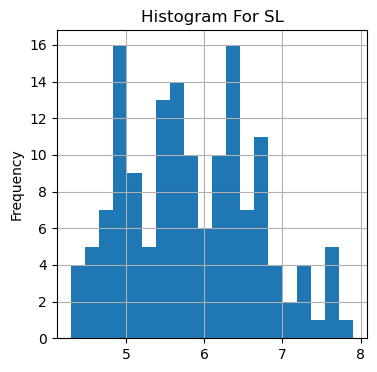

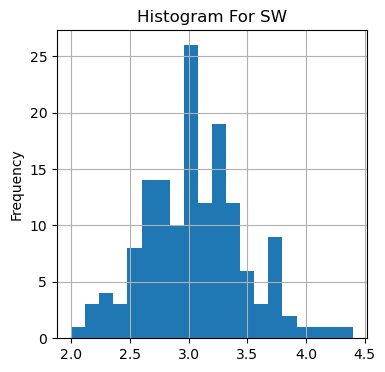

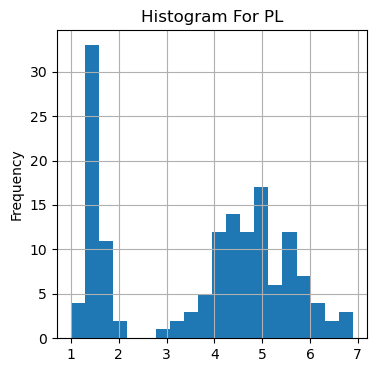

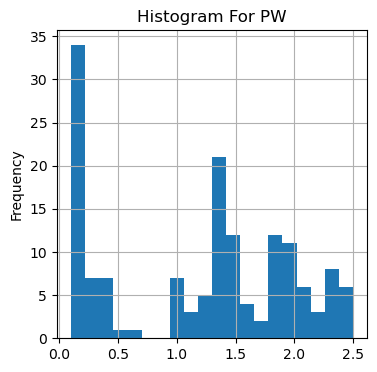

In [134]:
#Histogram of numeric features:
for i in numeric_data.columns:
    fig=plt.figure()
    df.loc[:,i].plot.hist(title="Histogram For "+i,bins=20,figsize=(4,4),grid=True)
    plt.show()

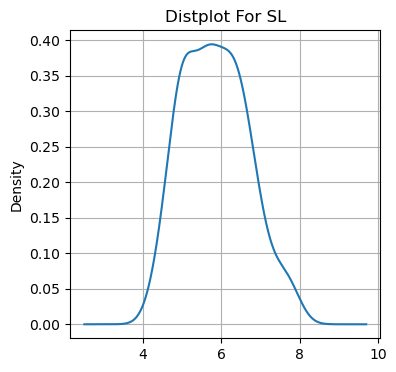

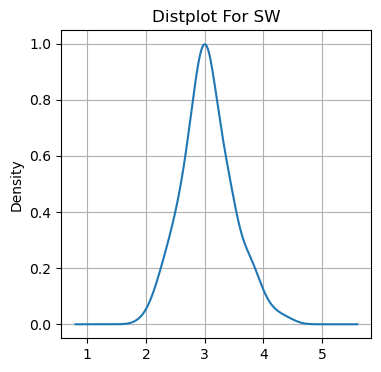

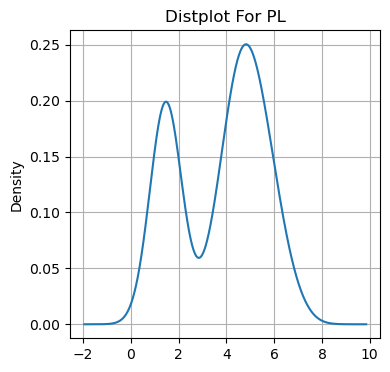

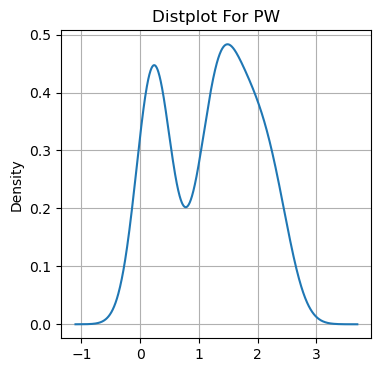

In [135]:
#Distplot of numeric features:
for i in numeric_data.columns:
    fig=plt.figure()
    df.loc[:,i].plot.density(title="Distplot For "+i,figsize=(4,4),grid=True)
    plt.show()

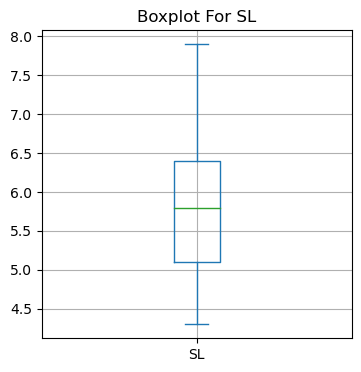

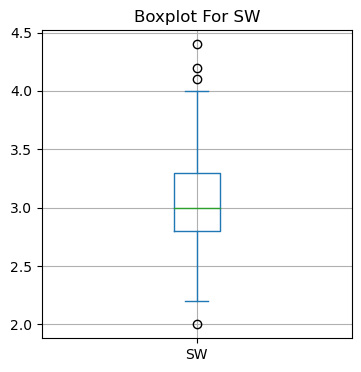

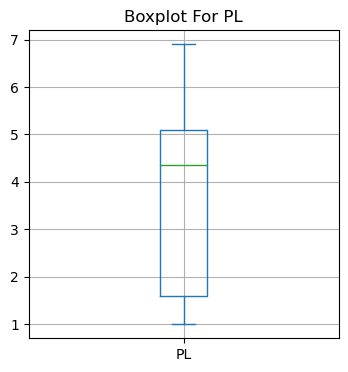

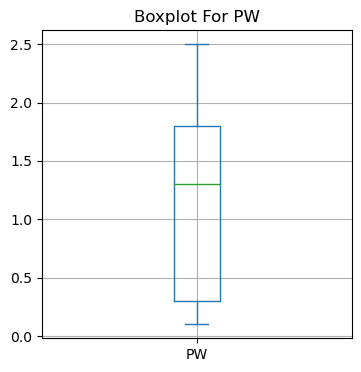

In [136]:
#Boxplot of numeric features:
for i in numeric_data.columns:
    df.loc[:,i].plot.box(title="Boxplot For "+i,figsize=(4,4),grid=True)
    plt.show()

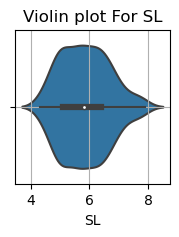

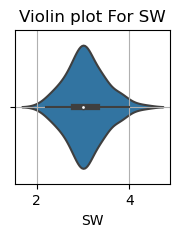

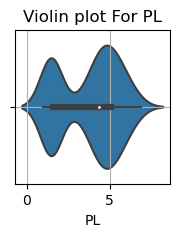

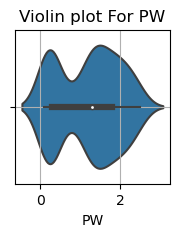

In [137]:
#Violin plot of numeric features:
import seaborn as sns
for i in numeric_data.columns:
    plt.title("Violin plot For "+i)
    sns.violinplot(data=numeric_data,x=i)
    plt.grid()
    plt.show()